In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
usuarios = pd.read_json('https://my.api.mockaroo.com/user_netflix.json?key=9879a790')
usuarios.head()

,id,username,gender,time_online,watch_time,gen_most_view,plataform,country,state,city
0,1,ftineman0,Non-binary,1278.67,16.99,Animation|Comedy|Fantasy,mobile,United States,District of Columbia,Washington
1,2,ebondesen1,Genderfluid,285.67,61.69,Comedy|Sci-Fi,console,United States,Massachusetts,Newton
2,3,smasham2,Male,1533.48,604.66,Comedy|War,console,United States,Connecticut,West Hartford
3,4,lflament3,Genderqueer,50.27,17.00,Thriller,smarttv,United States,California,Pasadena
4,5,jlambell4,Bigender,1638.28,1064.40,Adventure,browser,United States,Kansas,Topeka


In [72]:
filmes = pd.read_json('https://my.api.mockaroo.com/movies.json?key=9879a790')
filmes.head()

,movieId,title,movie_gen,year,language,watch_time
0,1,Dream Land,(no genres listed),2007-03-11 20:38:31,es,5175
1,2,Pete Seeger: The Power of Song,Documentary,1981-10-10 13:02:12,ru,6193
2,3,Journey to Saturn (Rejsen til Saturn),Action|Adventure|Animation|Sci-Fi,2015-03-10 22:39:03,es,7249
3,4,Kamchatka,Drama,2015-05-11 21:02:25,es,11163
4,5,In Search of a Midnight Kiss,Comedy|Romance,2014-03-24 14:26:27,en,2639


In [73]:
votes = pd.read_json('https://my.api.mockaroo.com/votes.json?key=9879a790')
votes.head()

,id,movieId,userId,vote,watch_comp,date
0,1,70,703,1,True,2011-12-02 02:30:15
1,2,66,578,2,True,2018-01-01 10:33:45
2,3,75,124,5,True,2013-08-09 18:12:23
3,4,21,909,2,True,2015-04-19 06:37:14
4,5,2,813,5,True,2018-02-01 14:47:15


<AxesSubplot:ylabel='Frequency'>

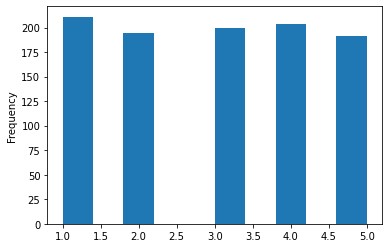

In [74]:
votes.vote.plot(kind='hist')

In [75]:
votes.vote.describe()

count    1000.000000
mean        2.970000
std         1.416724
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: vote, dtype: float64

In [76]:
media_filme = votes.groupby('movieId').mean().vote
media_filme.head()

movieId
1    3.125000
2    3.142857
3    2.529412
4    2.700000
5    3.333333
Name: vote, dtype: float64

<AxesSubplot:ylabel='Frequency'>

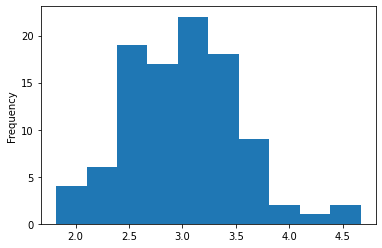

In [77]:
media_filme.plot(kind='hist')

<AxesSubplot:ylabel='vote'>

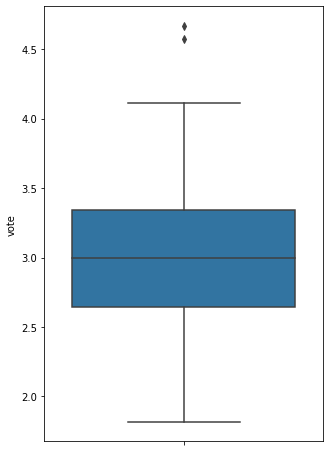

In [78]:
plt.figure(figsize=(5,8))
sns.boxplot(y=media_filme)

In [79]:
media_filme.describe()

count    100.000000
mean       3.000348
std        0.532005
min        1.818182
25%        2.641234
50%        3.000000
75%        3.343750
max        4.666667
Name: vote, dtype: float64

c:\users\claudinei\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote', ylabel='Density'>

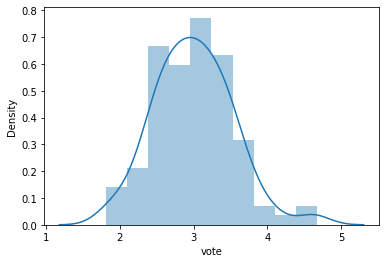

In [80]:
sns.distplot(media_filme)

In [81]:
filmes.language.unique()

array(['es', 'ru', 'en', 'zh', 'po', 'pt', 'fr', 'jp'], dtype=object)

In [82]:
filmes.language.describe()

count     100
unique      8
top        zh
freq       21
Name: language, dtype: object

In [83]:
lingua_mais_popular = filmes.language.describe().top

In [84]:
linguas_principais = filmes.language.value_counts().to_frame().reset_index()
linguas_principais.columns = ['original', 'total']
linguas_principais

,original,total
0,zh,21
1,ru,15
2,es,13
3,po,11
4,pt,11
5,en,11
6,fr,10
7,jp,8


<AxesSubplot:xlabel='original', ylabel='total'>

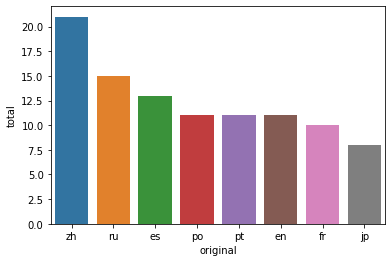

In [85]:
sns.barplot(x="original", y = "total", data = linguas_principais)

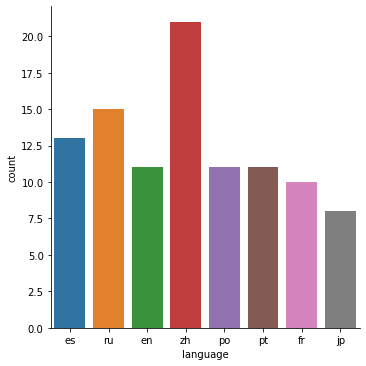

In [86]:
sns.catplot(x = "language", kind = "count", data = filmes)

In [87]:
total_each_language = filmes.language.value_counts()
total_geral = total_each_language.sum()
po_total = total_each_language.loc[lingua_mais_popular]
total_filter = total_geral -  po_total
print('Total sem mais popular: ' + str(total_filter))

Total sem mais popular: 79


<AxesSubplot:xlabel='lingua', ylabel='total'>

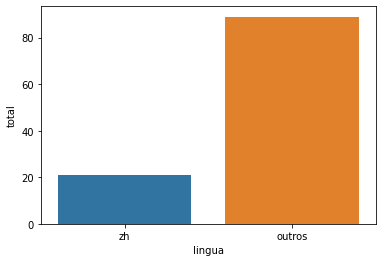

In [88]:
dados = {
    'lingua' : [lingua_mais_popular,'outros'],
    'total' : [po_total, total_filter_po]
}
dados = pd.DataFrame(dados)
sns.barplot(x="lingua", y="total", data = dados)